# Study of noise prediction mechanisms

Differents machine learning algorithms are tested and studied in order to predict noise level in areas with limited or absent noise detections.
These models are trained only on real noises collected.

All models aim to solve regression problem, given that the vales to predict are continuous, and they are based on the following approaches:
- K Nearest Neighbors
- Random Forest
- Stochastic Gradient Descent (SGD)
- Neural network

In [2]:
import const
import pandas as pd

import utils.models_utils as models
import utils.common_utils as utils

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor


## Dataset

Original data are extracted directy from the database and contain **two features** (*latitude* e *longitude*) and **one target** (*noise*). In order to help further the models to detect patterns in data, we generate 12 addictional features from the exixting ones.

For **k** that assumes 5, 10 or 50 as value, generated features are:
- Average noise between point k neighbors
- Average distance between point k neighbors
- Noise standard deviation between point k neighbors
- Distance standard deviation between point k neighbors

In [2]:
# get dataset
dataset = utils.load_dataset(10)

All models are trained and tested on three different views of the dataset: 
- **base dataset** with two original features (latitude and longitude)
- **complete dataset** with all generated features
- **sub dataset** with 10 best features

In [3]:
for column in dataset.x_train_subset.columns:
    print(column)

latitude
longitude
5_noise_mean
5_noise_std
10_distance_std
10_noise_mean
10_noise_std
50_distance_std
50_noise_mean
50_noise_std


In [4]:
# fit scalers
# base set
base_set_standard_scaler = StandardScaler().fit(dataset.x_train_base)
base_set_minmax_scaler = MinMaxScaler().fit(dataset.x_train_base)

# complete set
complete_set_standard_scaler = StandardScaler().fit(dataset.x_train_complete)
complete_set_minmax_scaler = MinMaxScaler().fit(dataset.x_train_complete)

# sub set
sub_set_standard_scaler = StandardScaler().fit(dataset.x_train_subset)
sub_set_minmax_scaler = MinMaxScaler().fit(dataset.x_train_subset)

## Classic machine learning models (KNN, RF, SGD)

With the aim of creating these classic models, for each dataset view are also tested three data preprocessing styles: 
- No scaling
- Standard scaling
- Min max scaling

Moreover, for each machine learning algorithm (**knn**, **rf**, **sdg**) there are created 9 models (3 dataset views x 3 preprocessing type), chosen and validated via *k-fold cross-validation*, necessary as the dataset haven't many samples.

## KNN

In [5]:
# KNN
knn_params = {
    'n_neighbors': [10, 20, 25, 30, 50, 60, 100, 150, 250],
}

### KNN: base dataset

In [6]:
# get models with differents types of preprocessing

base_results = models.train_models(KNeighborsRegressor(), dataset.x_train_base,
                    dataset.y_train, dataset.x_test_base, dataset.y_test, knn_params, base_set_standard_scaler, base_set_minmax_scaler)
base_results['set'] = 'base'

base_results

,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,params,preprocessing,set
0,0.403764,0.351907,0.000136,0.000136,0.011662,0.011679,{'n_neighbors': 20},no,base
1,0.403392,0.356415,0.000136,0.000135,0.011666,0.011638,{'n_neighbors': 20},standard,base
2,0.405647,0.360384,0.000136,0.000135,0.011644,0.011602,{'n_neighbors': 20},minmax,base


### KNN: subdataset

In [7]:
sub_results = models.train_models(KNeighborsRegressor(), dataset.x_train_subset,
                    dataset.y_train, dataset.x_test_subset, dataset.y_test, knn_params, sub_set_standard_scaler, sub_set_minmax_scaler)
                    
sub_results['set'] = 'sub'

sub_results

,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,params,preprocessing,set
0,0.403363,0.354400,0.000136,0.000136,0.011666,0.011657,{'n_neighbors': 20},no,sub
1,0.461709,0.332978,0.000123,0.000140,0.011081,0.011848,{'n_neighbors': 50},standard,sub
2,0.459487,0.338822,0.000123,0.000139,0.011104,0.011796,{'n_neighbors': 60},minmax,sub


### KNN: complete dataset

In [8]:
complete_results = models.train_models(KNeighborsRegressor(), dataset.x_train_complete,
                    dataset.y_train, dataset.x_test_complete, dataset.y_test, knn_params, complete_set_standard_scaler, complete_set_minmax_scaler)

complete_results['set'] = 'complete'

complete_results

,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,params,preprocessing,set
0,0.392639,0.362945,0.000139,0.000134,0.011771,0.011579,{'n_neighbors': 25},no,complete
1,0.456553,0.327114,0.000124,0.000142,0.011134,0.011900,{'n_neighbors': 50},standard,complete
2,0.458464,0.338566,0.000124,0.000139,0.011114,0.011799,{'n_neighbors': 50},minmax,complete


### KNN: Overall results

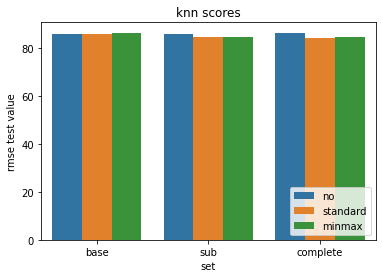

In [12]:
knn_results = base_results.append([sub_results, complete_results])
knn_results['model'] = 'knn'

knn_results.to_csv('./results/knn_results.csv')

modified_res = knn_results.apply(lambda x: 1/x if x.name == 'rmse_test' else x)
utils.plot_scores(x='set', y='rmse_test', hue='preprocessing', data=modified_res, title='knn scores')

## Random Forest

In [10]:
rf_params = {
    'n_estimators': [200, 300, 500]
}

### RF: dataset base 

In [11]:
# get models with differents types of preprocessing
base_results = models.train_models(RandomForestRegressor(), dataset.x_train_base,
                    dataset.y_train, dataset.x_test_base, dataset.y_test, rf_params, base_set_standard_scaler, base_set_minmax_scaler)
base_results['set'] = 'base'

base_results

,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,params,preprocessing,set
0,0.872189,0.291515,0.000029,0.000149,0.005400,0.012211,{'n_estimators': 300},no,base
1,0.885263,0.289161,0.000026,0.000150,0.005116,0.012231,{'n_estimators': 500},standard,base
2,0.881444,0.292525,0.000027,0.000149,0.005200,0.012202,{'n_estimators': 500},minmax,base


### RF: subdataset

In [12]:
sub_results = models.train_models(RandomForestRegressor(), dataset.x_train_subset,
                    dataset.y_train, dataset.x_test_subset, dataset.y_test, rf_params, sub_set_standard_scaler, sub_set_minmax_scaler)
sub_results['set'] = 'sub'

sub_results

,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,params,preprocessing,set
0,0.890584,0.234515,0.000025,0.000161,0.004996,0.012693,{'n_estimators': 500},no,sub
1,0.890553,0.216519,0.000025,0.000165,0.004997,0.012841,{'n_estimators': 200},standard,sub
2,0.890105,0.233979,0.000025,0.000161,0.005007,0.012697,{'n_estimators': 500},minmax,sub


### RF: complete dataset

In [13]:
complete_results = models.train_models(RandomForestRegressor(), dataset.x_train_complete,
                    dataset.y_train, dataset.x_test_complete, dataset.y_test, rf_params, complete_set_standard_scaler, complete_set_minmax_scaler)
complete_results['set'] = 'complete'

complete_results

,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,params,preprocessing,set
0,0.889223,0.231335,0.000025,0.000162,0.005027,0.012719,{'n_estimators': 300},no,complete
1,0.891736,0.233428,0.000025,0.000161,0.004970,0.012702,{'n_estimators': 500},standard,complete
2,0.890824,0.243639,0.000025,0.000159,0.004990,0.012617,{'n_estimators': 500},minmax,complete


### RF: overall results

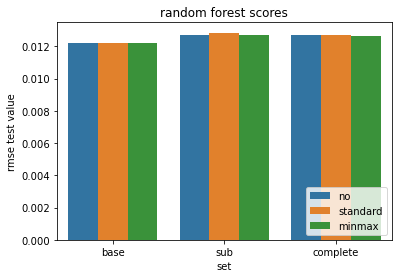

In [14]:
rf_results = base_results.append([sub_results, complete_results])
rf_results['model'] = 'rf'

rf_results.to_csv('./results/rf_results.csv')

modified_res = rf_results.apply(lambda x: 1/x if x.name == 'rmse_test' else x)
utils.plot_scores(x='set', y='rmse_test', hue='preprocessing',  data=modified_res, title='random forest scores')

## SGD

In [15]:
sgd_params = {
    'early_stopping': [True, False],
    'alpha': [10.0**-n for n in range(7)]
}

### SGD: base dataset

In [16]:
# get models with differents types of preprocessing
base_results = models.train_models(SGDRegressor(), dataset.x_train_base,
                    dataset.y_train, dataset.x_test_base, dataset.y_test, sgd_params, base_set_standard_scaler, base_set_minmax_scaler)
base_results['set'] = 'base'

base_results

,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,params,preprocessing,set
0,-6.518146e+47,-7.064441e+47,1.486851e+44,1.486819e+44,1.219365e+22,1.219352e+22,"{'alpha': 1e-05, 'early_stopping': False}",no,base
1,4.473768e-02,3.538689e-02,2.179044e-04,2.030175e-04,1.476159e-02,1.424842e-02,"{'alpha': 1e-05, 'early_stopping': True}",standard,base
2,3.418578e-02,2.997188e-02,2.203114e-04,2.041572e-04,1.484289e-02,1.428836e-02,"{'alpha': 0.1, 'early_stopping': False}",minmax,base


### SGD: subdataset

In [17]:
sub_results = models.train_models(SGDRegressor(), dataset.x_train_subset,
                    dataset.y_train, dataset.x_test_subset, dataset.y_test, sgd_params, sub_set_standard_scaler, sub_set_minmax_scaler)
sub_results['set'] = 'sub'

sub_results

,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,params,preprocessing,set
0,-1.738301e+47,-1.883782e+47,3.965230e+43,3.964705e+43,6.297007e+21,6.296591e+21,"{'alpha': 0.1, 'early_stopping': False}",no,sub
1,4.806282e-01,3.148131e-01,1.184737e-04,1.442080e-04,1.088456e-02,1.200866e-02,"{'alpha': 0.001, 'early_stopping': True}",standard,sub
2,4.380439e-01,3.456274e-01,1.281875e-04,1.377227e-04,1.132199e-02,1.173553e-02,"{'alpha': 0.01, 'early_stopping': True}",minmax,sub


### SGD: complete dataset

In [18]:
complete_results = models.train_models(SGDRegressor(), dataset.x_train_complete,
                    dataset.y_train, dataset.x_test_complete, dataset.y_test, sgd_params, complete_set_standard_scaler, complete_set_minmax_scaler)
complete_results['set'] = 'complete'

complete_results

,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,params,preprocessing,set
0,-6.950444e+47,-7.530294e+47,1.585463e+44,1.584865e+44,1.259152e+22,1.258914e+22,"{'alpha': 0.0001, 'early_stopping': False}",no,complete
1,4.765298e-01,3.468139e-01,1.194085e-04,1.374729e-04,1.092742e-02,1.172489e-02,"{'alpha': 0.1, 'early_stopping': False}",standard,complete
2,4.419565e-01,3.466093e-01,1.272950e-04,1.375160e-04,1.128251e-02,1.172672e-02,"{'alpha': 0.01, 'early_stopping': True}",minmax,complete


### SGD: overall results

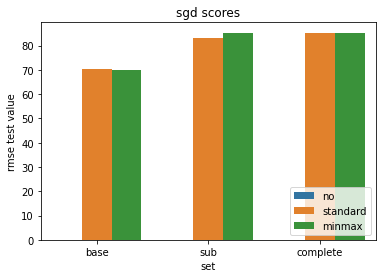

In [3]:
sgd_results = base_results.append([sub_results, complete_results])
sgd_results['model'] = 'sgd'

sgd_results.to_csv('./results/sgd_results.csv')

modified_res = sgd_results.apply(lambda x: 1/x if x.name == 'rmse_test' else x)
utils.plot_scores(x='set', y='rmse_test', hue='preprocessing', data=modified_res, title='sgd scores')

## Neural networks

Unlike the pipeline for the previux presented models, here for each dataset view (*base*, *sub* and *complete*) we apply only one preprocessing type, the *min max scaling*.

We train as many neural networs as there are the chosen hyperparameters combinations in order to choose the combination that makes the network better in terms of test score and generalization.

The models hypeparameters are the following:
- **hidden_size**:  amount of neurons for each hidden layer,
- **nums_layers**: amount of hidden layers,
- **num_epochs**: training epochs,
- **batch_sizes**: batch size,
- **learning_rate** : learning rate,
- **gamma**: gamma used for the learning rate decay, 
- **dropout**: percentage of dropout

Futhermore, we chose the **Stochastic Gradient Descent** as optimizer for all networks and the **Mean Squared Error Loss** as loss function.

### Neural network: base dataset

In [9]:
# base set (minmax scaled data)
# no deep  neural nets

nn_params = {
    "hidden_sizes": [5, 10, 20, 50, 100],
    "nums_layers": [1, 2],
    "num_epochs": [500, 1000],
    "batch_sizes": [512],
    "learning_rates": [0.1],
    "gamma": [0.05],
    "dropout": [0, 0.2]
}

train_data_nn, test_data_nn = utils.get_nn_dataset(dataset.x_train_base, dataset.x_test_base, dataset.y_train, dataset.y_test ,scaler = base_set_minmax_scaler)

base_nn_results = models.train_neural_nets(train_data_nn, test_data_nn, nn_params)

40 neural net to train
	1 / 40 (2.5%): R2 train: -0.2575365261152627, R2 test:-0.2707166534919003
	2 / 40 (5.0%): R2 train: -0.2140545511947105, R2 test:-0.255433192570101
	3 / 40 (7.5%): R2 train: -0.007307630031195611, R2 test:-0.0200125935974389
	4 / 40 (10.0%): R2 train: -0.007199403853889175, R2 test:-0.029548940248320887
	5 / 40 (12.5%): R2 train: 0.02391301211890451, R2 test:0.010155927346085059
	6 / 40 (15.0%): R2 train: -0.04134845803652243, R2 test:-0.03365859679985861
	7 / 40 (17.5%): R2 train: -0.22708022728507493, R2 test:-0.24568244615105095
	8 / 40 (20.0%): R2 train: -0.3191547951048346, R2 test:-0.30152342964044787
	9 / 40 (22.5%): R2 train: 0.05559306343691539, R2 test:0.07385436410701873
	10 / 40 (25.0%): R2 train: -0.39787835700505014, R2 test:-0.370135184223767
	11 / 40 (27.5%): R2 train: 0.07713481215296791, R2 test:0.08904232841980808
	12 / 40 (30.0%): R2 train: 0.0008593977177620005, R2 test:-0.031113338142201963
	13 / 40 (32.5%): R2 train: 0.005298374879894929, 

Since the base dataset has only two features, we also test neural networks with a deeper architecture. 

In [27]:
# deep neural nets
nn_params = {
    "hidden_sizes": [15, 20, 50],
    "nums_layers": [4, 6, 10],
    "num_epochs": [500, 1000],
    "batch_sizes": [64, 512],
    "learning_rates": [0.1],
    "gamma": [0.05], # lr decay
    "dropout": [0, 0.2]
    }

base_nn_results = base_nn_results.append(models.train_neural_nets(train_data_nn, test_data_nn, nn_params))

base_nn_results['set'] = "base"
base_nn_results['preprocessing'] = 'minmax'

utils.res_to_csv(base_nn_results, f'{const.csv_results_folder}base_nn_results.csv')

# print three best results
base_nn_results.sort_values('r2_test').head(3)

72 neural net to train
	1 / 72 (1.389%): R2 train: -0.00308000540829223, R2 test:-0.0020611508165175874
	2 / 72 (2.778%): R2 train: 0.008800338324041368, R2 test:0.0011245475268935046
	3 / 72 (4.167%): R2 train: 0.000735390263171154, R2 test:-0.003245780490317207
	4 / 72 (5.556%): R2 train: -0.03904335188463648, R2 test:-0.04218142676335668
	5 / 72 (6.944%): R2 train: 0.014321667499986868, R2 test:0.009498206211174476
	6 / 72 (8.333%): R2 train: 0.018354268063696666, R2 test:0.01845433227212212
	7 / 72 (9.722%): R2 train: -0.012300174562897004, R2 test:-0.012620479473366197
	8 / 72 (11.111%): R2 train: -0.014870794145389166, R2 test:-0.011248198566713441
	9 / 72 (12.5%): R2 train: -0.0009852405959300814, R2 test:-0.002512997717073473
	10 / 72 (13.889%): R2 train: -0.0634995072188842, R2 test:-0.08886017982618744
	11 / 72 (15.278%): R2 train: -0.01302243743571374, R2 test:-0.01590832217928506
	12 / 72 (16.667%): R2 train: -0.05858100734515026, R2 test:-0.07953810368043568
	13 / 72 (18.0

,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test,params,mean_ms_epochs,last_mse_epochs,set,preprocessing
48,0.000166,0.012866,0.274314,0.000162,0.012733,0.229670,"{'hs': 50, 'n_layers': 5, 'n_epochs': 500, 'b_...","[0.00023199337574995445, 0.0002253971386900437...","[0.00019474091823212802, 0.0001928751444211229...",base,minmax
52,0.000178,0.013360,0.217541,0.000170,0.013037,0.192499,"{'hs': 50, 'n_layers': 5, 'n_epochs': 1000, 'b...","[0.000673787467887302, 0.00025801660836916604,...","[0.00020647146448027343, 0.0002058261743513867...",base,minmax
28,0.000208,0.014436,0.086435,0.000193,0.013893,0.082901,"{'hs': 20, 'n_layers': 5, 'n_epochs': 1000, 'b...","[0.000486201904559679, 0.0002266672305936203, ...","[0.0001854849251685664, 0.00018541040481068194...",base,minmax


### Neural network: subdataset

In [23]:
nn_params = {
    "hidden_sizes": [15, 20, 50, 100, 200],
    "nums_layers": [1, 2],
    "num_epochs": [500, 1000],
    "batch_sizes": [512],
    "learning_rates": [0.1],
    "gamma": [0.05], # lr decay
    "dropout": [0, 0.2]
}

train_data_nn, test_data_nn = utils.get_nn_dataset(dataset.x_train_subset, dataset.x_test_subset, dataset.y_train, dataset.y_test, scaler=sub_set_minmax_scaler)

sub_nn_results = models.train_neural_nets(train_data_nn, test_data_nn, nn_params)
sub_nn_results['set'] = "sub"
sub_nn_results['preprocessing'] = 'minmax'

utils.res_to_csv(sub_nn_results, f'{const.csv_results_folder}subset_nn_results.csv')

sub_nn_results.sort_values('r2_test').head(3)

40 neural net to train
	1 / 40 (2.5%): R2 train: 0.32707829437530134, R2 test:0.22975857130704014
	2 / 40 (5.0%): R2 train: -0.050758729267165625, R2 test:-0.07432788218358222
	3 / 40 (7.5%): R2 train: 0.12094924437045473, R2 test:-0.027518392710853323
	4 / 40 (10.0%): R2 train: 0.022421514184854496, R2 test:0.018791211275630437
	5 / 40 (12.5%): R2 train: 0.14292966731715762, R2 test:0.13978086980749838
	6 / 40 (15.0%): R2 train: 0.3201661897590392, R2 test:0.2524989528795606
	7 / 40 (17.5%): R2 train: -0.018223629979430278, R2 test:-0.03991786040688061
	8 / 40 (20.0%): R2 train: -0.030294063244784564, R2 test:-0.054311330199573904
	9 / 40 (22.5%): R2 train: 0.3808082062432838, R2 test:0.2561193975420363
	10 / 40 (25.0%): R2 train: 0.2355382735130861, R2 test:0.16172943616678592
	11 / 40 (27.5%): R2 train: 0.32776624997396075, R2 test:0.21245819273959643
	12 / 40 (30.0%): R2 train: 0.27026298575479346, R2 test:0.2162607678936458
	13 / 40 (32.5%): R2 train: 0.2622256032994901, R2 test:0

,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test,params,mean_ms_epochs,last_mse_epochs,set,preprocessing
38,0.000129,0.011341,0.436180,0.000141,0.011883,0.329054,"{'hs': 200, 'n_layers': 3, 'n_epochs': 1000, '...","[0.0013990761986601033, 0.00032593633347590057...","[0.00030982724274508655, 0.0002796080661937594...",sub,minmax
36,0.000133,0.011554,0.414791,0.000142,0.011937,0.323006,"{'hs': 200, 'n_layers': 3, 'n_epochs': 500, 'b...","[0.00030319381871127656, 0.0002711402298051065...","[0.0002283065114170313, 0.00020710189710371196...",sub,minmax
32,0.000143,0.011973,0.371512,0.000143,0.011977,0.318377,"{'hs': 200, 'n_layers': 2, 'n_epochs': 500, 'b...","[0.0013640713545360736, 0.0004905675741611049,...","[0.00030853209318593144, 0.0002344549720874056...",sub,minmax


### Neural network: complete dataset

In [24]:
nn_params = {
    "hidden_sizes": [20, 50, 100, 200],
    "nums_layers": [1, 2],
    "num_epochs": [500, 1000],
    "batch_sizes": [512],
    "learning_rates": [0.1],
    "gamma": [0.05], # lr decay
    "dropout": [0, 0.2]
}

train_data_nn, test_data_nn = utils.get_nn_dataset(dataset.x_train_complete, dataset.x_test_complete, dataset.y_train, dataset.y_test, scaler=complete_set_minmax_scaler)

complete_nn_results = models.train_neural_nets(train_data_nn, test_data_nn, nn_params)
complete_nn_results['set'] = "complete"
complete_nn_results['preprocessing'] = 'minmax'

utils.res_to_csv(complete_nn_results, f'{const.csv_results_folder}complete_nn_results.csv')

complete_nn_results.sort_values('r2_test').head(3)

32 neural net to train
	1 / 32 (3.125%): R2 train: 0.1465358931677495, R2 test:0.06788330289342293
	2 / 32 (6.25%): R2 train: 0.24574100881877226, R2 test:0.11216921406838698
	3 / 32 (9.375%): R2 train: 0.39077591104898557, R2 test:0.30109718168937183
	4 / 32 (12.5%): R2 train: 0.36608093371818373, R2 test:0.2505414647477646
	5 / 32 (15.625%): R2 train: -0.048233050757866325, R2 test:-0.06162406501611217
	6 / 32 (18.75%): R2 train: 0.09357314990029286, R2 test:0.0737761115375063
	7 / 32 (21.875%): R2 train: 0.28449111742708477, R2 test:0.2295217062976408
	8 / 32 (25.0%): R2 train: 0.06628747485891007, R2 test:0.042772940754922106
	9 / 32 (28.125%): R2 train: 0.34419051554719604, R2 test:0.17489248129325408
	10 / 32 (31.25%): R2 train: 0.35996456516630104, R2 test:0.2752518694794138
	11 / 32 (34.375%): R2 train: 0.3146368230187495, R2 test:0.26712292275587113
	12 / 32 (37.5%): R2 train: 0.26054967585822564, R2 test:0.13223120987762627
	13 / 32 (40.625%): R2 train: 0.413457646743451, R2 

,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test,params,mean_ms_epochs,last_mse_epochs,set,preprocessing
31,0.000133,0.011554,0.414799,0.000140,0.011850,0.332761,"{'hs': 200, 'n_layers': 3, 'n_epochs': 1000, '...","[0.0021953876462898086, 0.0003283803317961948,...","[0.00031591730657964945, 0.0002698924217838794...",complete,minmax
26,0.000131,0.011454,0.424816,0.000143,0.011947,0.321781,"{'hs': 200, 'n_layers': 2, 'n_epochs': 1000, '...","[0.0028055964836052488, 0.0003016445137161229,...","[0.0003571871784515679, 0.0002546776959206909,...",complete,minmax
14,0.000140,0.011834,0.386038,0.000145,0.012029,0.312453,"{'hs': 50, 'n_layers': 3, 'n_epochs': 1000, 'b...","[0.0042550164923471, 0.0002966421972295003, 0....","[0.0003554851864464581, 0.00018253852613270283...",complete,minmax


### Neural network: overall results

,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test,params,mean_ms_epochs,last_mse_epochs,set,preprocessing,model
31,0.000133,0.011554,0.414799,0.000140,0.011850,0.332761,"{'hs': 200, 'n_layers': 3, 'n_epochs': 1000, '...","[0.0021953876462898086, 0.0003283803317961948,...","[0.00031591730657964945, 0.0002698924217838794...",complete,minmax,nn
38,0.000129,0.011341,0.436180,0.000141,0.011883,0.329054,"{'hs': 200, 'n_layers': 3, 'n_epochs': 1000, '...","[0.0013990761986601033, 0.00032593633347590057...","[0.00030982724274508655, 0.0002796080661937594...",sub,minmax,nn
48,0.000166,0.012866,0.274314,0.000162,0.012733,0.229670,"{'hs': 50, 'n_layers': 5, 'n_epochs': 500, 'b_...","[0.00023199337574995445, 0.0002253971386900437...","[0.00019474091823212802, 0.0001928751444211229...",base,minmax,nn


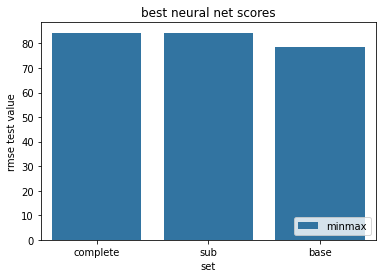

In [6]:
nn_results = base_nn_results.append([sub_nn_results, complete_nn_results])
nn_results['model'] = 'nn'

# get best res for each set results
nn_best_results = nn_results.sort_values(by=['rmse_test', 'r2_test']).groupby(['set', 'preprocessing']).head(1)

modified_res = nn_best_results.apply(lambda x: 1/x if x.name == 'rmse_test' else x)
utils.plot_scores('set', 'rmse_test', 'preprocessing', modified_res, "best neural net scores")

nn_best_results

## Final results

Comparing the best results for each tested algorithm, it's possible to notice that the **KNN model** performs better on test set while the worst model is the **random forest**, although it has excellent results on training set (*large overfitting*).

,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,params,preprocessing,set,model
0,0.392639,0.362945,0.000139,0.000134,0.011771,0.011579,{'n_neighbors': 25},no,complete,knn
1,0.476530,0.346814,0.000119,0.000137,0.010927,0.011725,"{'alpha': 0.1, 'early_stopping': False}",standard,complete,sgd
31,0.414799,0.332761,0.000133,0.000140,0.011554,0.011850,"{'hs': 200, 'n_layers': 3, 'n_epochs': 1000, '...",minmax,complete,nn
2,0.881444,0.292525,0.000027,0.000149,0.005200,0.012202,{'n_estimators': 500},minmax,base,rf


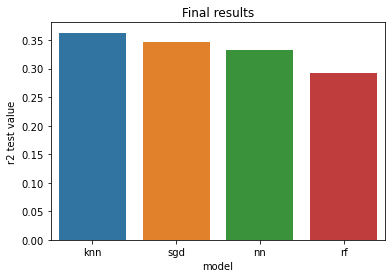

In [10]:
total_results = knn_results.append([rf_results, sgd_results, nn_best_results])

total_best_results = total_results.sort_values(by=['rmse_test']).groupby('model').head(1)

utils.plot_scores('model', 'r2_test', None, total_best_results, 'Final results')

# not show mean ms epochs and last mse epochs
total_best_results.drop(['mean_ms_epochs', 'last_mse_epochs'], axis=1)